# How To Read and Plot a Data File

In this example we will see how to open a text file containing some data we want to plot

In [1]:
import numpy as np

We fake some data by using a random number generator

In [2]:
x = np.random.uniform(0.0,3.0,100)
y = np.random.uniform(10.0,100.0,100)

We now add a column with sequential number to fake the day the data was taken for example

In [3]:
xx=np.c_[np.linspace(1,100,100), x, y]

In [4]:
#print the first 10 rows
print(xx[:10,:])
print('\n')
# and the last 10 rows
print(xx[-10:,:])

[[ 1.          1.21179877 32.42232905]
 [ 2.          0.41194956 38.50883468]
 [ 3.          0.79403345 70.28788663]
 [ 4.          0.52846827 52.99424767]
 [ 5.          2.00532403 92.85002475]
 [ 6.          2.37908437 91.96733906]
 [ 7.          0.85827917 44.77229592]
 [ 8.          1.85395158 44.31873004]
 [ 9.          1.34560788 66.2713413 ]
 [10.          0.17604155 63.642654  ]]


[[ 91.           1.29552842  14.88197368]
 [ 92.           0.80644704  41.64364857]
 [ 93.           1.67669488  92.15267775]
 [ 94.           2.60832261  64.0072096 ]
 [ 95.           1.72979424  54.25443241]
 [ 96.           1.41010477  82.98888167]
 [ 97.           0.21325828  84.67031639]
 [ 98.           1.33965198  24.03239691]
 [ 99.           0.68151521  60.88695199]
 [100.           0.22476034  17.22329053]]


In [5]:
# We save the table in a human-readable format
np.savetxt('./fake_data.txt',xx,
           header='giorno \t | temp \t | press',
           comments='# fake data\n# generated by me\n',
           delimiter='\t|',
           fmt='%1.3f')

In [6]:
#we can check the content of the file
#!head ./fake_data.txt

## Read the Data File

In [7]:
# load the data table
data = np.genfromtxt('./fake_data.txt',
                     delimiter="|",
                     skip_header=2,
                     names=True)

print('Column names and dtypes: ', data.dtype)
print('Data array shape: ',data.shape)

Column names and dtypes:  [('giorno', '<f8'), ('temp', '<f8'), ('press', '<f8')]
Data array shape:  (100,)


In [8]:
print(data['press'])

[32.422 38.509 70.288 52.994 92.85  91.967 44.772 44.319 66.271 63.643
 41.289 30.596 42.015 10.692 42.969 86.832 33.419 57.813 33.039 39.584
 58.563 16.99  62.516 15.407 15.625 52.047 93.272 84.959 12.041 79.433
 50.066 16.576 59.672 11.834 70.093 63.668 15.307 58.716 95.297 30.09
 15.481 99.99  31.126 26.601 97.101 43.668 16.401 30.234 70.101 73.56
 28.772 15.769 79.966 68.74  15.384 93.919 84.868 10.894 83.098 31.277
 21.203 47.678 97.249 77.965 36.001 75.025 88.539 71.426 14.28  72.151
 60.144 31.144 44.003 62.058 72.008 69.609 10.546 79.827 18.02  47.19
 99.641 86.768 99.325 76.551 72.518 18.315 12.281 95.059 89.541 31.745
 14.882 41.644 92.153 64.007 54.254 82.989 84.67  24.032 60.887 17.223]


## Produce Some Plots

In [9]:
import matplotlib.pyplot as plt
plt.rcParams['font.size'] = 16

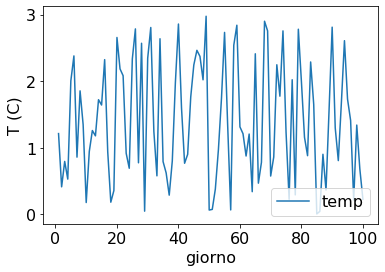

In [10]:
plt.plot(data['giorno'], data['temp'], label='temp')
plt.legend(loc='lower right')
plt.xlabel('giorno')
plt.ylabel('T (C)')
plt.show() #this is actually only needed outside a jupyter notebook

## Another Way to Read a Table

This method is useful expecially for very large tables and to better control formatting.

In [11]:
import pandas

data2 = pandas.read_csv('./fake_data.txt',
                        sep='|',
                        comment='#',
                        header=0,)

In [12]:
data2 #show the table

,giorno \t,temp \t,press
0,1.0,1.212,32.422
1,2.0,0.412,38.509
2,3.0,0.794,70.288
3,4.0,0.528,52.994
4,5.0,2.005,92.850
...,...,...,...
95,96.0,1.410,82.989
96,97.0,0.213,84.670
97,98.0,1.340,24.032
98,99.0,0.682,60.887


In [13]:
print(data2.columns)

Index(['giorno \t ', ' temp \t ', ' press'], dtype='object')


Let's clean the header by removing the tab in the name of the columns since we don't like it.

In [14]:
data2.columns = data2.columns.str.strip()
print(data2.columns)

Index(['giorno', 'temp', 'press'], dtype='object')


In [15]:
data2

,giorno,temp,press
0,1.0,1.212,32.422
1,2.0,0.412,38.509
2,3.0,0.794,70.288
3,4.0,0.528,52.994
4,5.0,2.005,92.850
...,...,...,...
95,96.0,1.410,82.989
96,97.0,0.213,84.670
97,98.0,1.340,24.032
98,99.0,0.682,60.887


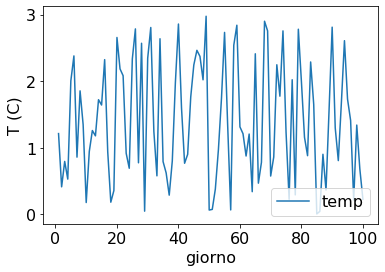

In [16]:
plt.plot(data2['giorno'], data2['temp'], label='temp')
plt.legend(loc='lower right')
plt.xlabel('giorno')
plt.ylabel('T (C)')
plt.show() #this is actually only needed outside a jupyter notebook